In [12]:
import skimage
import numpy as np
import os
import matplotlib.pyplot as plt
from storm_analysis.spliner.psf_to_spline import psfToSpline
import pickle
from storm_analysis.spliner.spline_to_psf import SplineToPSF3D
from PIL import Image
from scipy import signal, ndimage, io
import time


In [13]:
# load PSF data
psf_stack = skimage.io.imread(os.path.join(os.getcwd(), 'TP_im122.tif'))
# psf_stack = 1e6*psf_stack/np.sum(psf_stack, axis=(1, 2), keepdims=True) # photon normalization
psf_stack = (psf_stack-np.min(psf_stack, axis=(1, 2), keepdims=True))/(np.max(psf_stack, axis=(1, 2), keepdims=True)-np.min(psf_stack, axis=(1, 2), keepdims=True)) # 01 normalization

idx_s = np.arange(0, psf_stack.shape[0], 2) # psf indices at seen positions
psf_s = psf_stack[idx_s, :, :] # psfs at seen positions
idx_us = np.arange(1, psf_stack.shape[0], 2) # # psf indices at unseen positions, for test

In [14]:
# dict for spliner
psf_s_dict = {"psf": psf_stack,
              "pixel_size": 0.11,  # um
              "type": "3D",
              "version": 2.0,
              "zmin": -2400,
              "zmax": 1800,
             }

with open('psf_s.pickle', 'wb') as handle:
    pickle.dump(psf_s_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
t0 = time.time()
psfToSpline('psf_s.pickle', 'psf_spline.pickle', 41) # get a spliner
t1 = time.time()
print(f"runtime: {t1-t0}s")

Generating 3D spline.
Generating XY splines.
Generating fitting spline.
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndCheck: value out of range: -1.0
spline1D.roundAndChe

  1 of 81
  2 of 81
  3 of 81
  4 of 81
  5 of 81
  6 of 81
  7 of 81
  8 of 81
  9 of 81
  10 of 81
  11 of 81
  12 of 81
  13 of 81
  14 of 81
  15 of 81
  16 of 81
  17 of 81
  18 of 81
  19 of 81
  20 of 81
  21 of 81
  22 of 81
  23 of 81
  24 of 81
  25 of 81
  26 of 81
  27 of 81
  28 of 81
  29 of 81
  30 of 81
  31 of 81
  32 of 81
  33 of 81
  34 of 81
  35 of 81
  36 of 81
  37 of 81
  38 of 81
  39 of 81
  40 of 81
  41 of 81
  42 of 81
  43 of 81
  44 of 81
  45 of 81
  46 of 81
  47 of 81
  48 of 81
  49 of 81
  50 of 81
  51 of 81
  52 of 81
  53 of 81
  54 of 81
  55 of 81
  56 of 81
  57 of 81
  58 of 81
  59 of 81
  60 of 81
  61 of 81
  62 of 81
  63 of 81
  64 of 81
  65 of 81
  66 of 81
  67 of 81
  68 of 81
  69 of 81
  70 of 81
  71 of 81
  72 of 81
  73 of 81
  74 of 81
  75 of 81
  76 of 81
  77 of 81
  78 of 81
  79 of 81
  80 of 81
  81 of 81
  cx 0.00 81
  cx 0.33 81
  cx 0.67 81
  cx 1.00 81
  cx 1.33 81
  cx 1.67 81
  cx 2.00 81
  cx 2.33 81
  cx 2.67 81
 

In [16]:
t0 = time.time()
psf_spliner = SplineToPSF3D('psf_spline.pickle') # use this spliner
psf_itp = np.zeros_like(psf_stack)

for i in range(psf_itp.shape[0]):
    im_spline = psf_spliner.getPSF(-2400+150*i)  # z: -2400:100:1800
    im = Image.fromarray(im_spline)
    im = im.resize([81, 81]) # the spliner can only have even pixels
    im = ndimage.interpolation.shift(im, -1, mode='nearest') # compensate from 1 pixel shift
    psf_itp[i, :, :] = im

t1 = time.time()
print(f"runtime: {t1-t0}s")
# psf_itp = 1e6*psf_itp/np.sum(psf_itp, axis=(1, 2), keepdims=True)
psf_itp = (psf_itp-np.min(psf_itp, axis=(1, 2), keepdims=True))/(np.max(psf_itp, axis=(1, 2), keepdims=True)-np.min(psf_itp, axis=(1, 2), keepdims=True)) # 01 normalization
io.savemat('psfs_spline.mat', dict(psfs_spline=psf_itp))

runtime: 13.748669147491455s


In [17]:
def images2row(im_stack):
    im_row = im_stack[0, :, :]
    for i in range(im_stack.shape[0]-1):
        im_row = np.concatenate((im_row, im_stack[i+1, :, :]), axis=1)
    return im_row

(-0.5, 647.5, 242.5, -0.5)

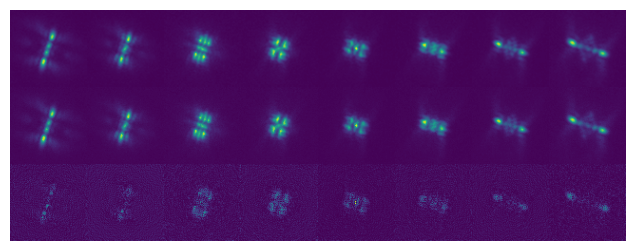

In [18]:
im_row1 = images2row(psf_itp[np.arange(8)*4 , :, :])  # from spliner
im_row2 = images2row(psf_stack[np.arange(8)*4 , :, :]) # from measurement 
im_row3 = np.abs(im_row1-im_row2)*8  #differecne, magnification factor
im_show = np.concatenate((im_row1, im_row2, im_row3), axis=0)

fig = plt.figure(figsize=[8, 3])
plt.imshow(im_show)
plt.axis('off')
# plt.savefig('seen.png', dpi=300)



(-0.5, 566.5, 242.5, -0.5)

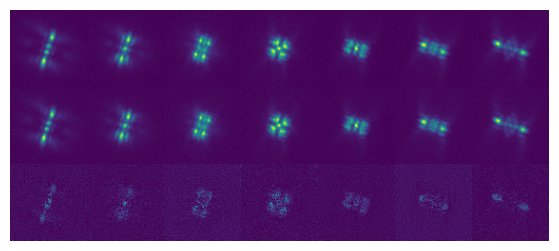

In [19]:
im_row1 = images2row(psf_itp[1+np.arange(7)*4, :, :])  # from spliner
im_row2 = images2row(psf_stack[1+np.arange(7)*4 , :, :]) # from measurement 
im_row3 = np.abs(im_row1-im_row2)*8  #differecne, magnification factor
im_show = np.concatenate((im_row1, im_row2, im_row3), axis=0)

fig = plt.figure(figsize=[7, 3])
plt.imshow(im_show)
plt.axis('off')
# plt.savefig('unseen.png', dpi=300)